In [106]:
import os
import pandas as pd
import PyPDF2
import nltk
import re
import joblib
import shutil
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove numbers/symbols
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

# Load dataset
df = pd.read_csv('Resume.csv')
df['cleaned_text'] = df['Resume_str'].apply(preprocess_text)

# Function to extract text from PDFs
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = " ".join([page.extract_text() for page in reader.pages if page.extract_text()])
    except Exception as e:
        print(f"Error reading {pdf_path}: {str(e)}")
    return preprocess_text(text)

# Load PDFs from directory
pdf_folder = "data"  # Change this to your actual folder path
pdf_texts = []
pdf_categories = []

for category in os.listdir(pdf_folder):  # Assuming folders are named by category
    category_path = os.path.join(pdf_folder, category)
    if os.path.isdir(category_path):
        for pdf_file in os.listdir(category_path):
            pdf_path = os.path.join(category_path, pdf_file)
            text = extract_text_from_pdf(pdf_path)
            if text:
                pdf_texts.append(text)
                pdf_categories.append(category)

# Convert to DataFrame and merge with CSV data
pdf_df = pd.DataFrame({"cleaned_text": pdf_texts, "Category": pdf_categories})
df = pd.concat([df[['cleaned_text', 'Category']], pdf_df], ignore_index=True)

# Save preprocessed dataset
df.to_csv("preprocessed_resumes.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
# Display the first few rows of the DataFrame to see how the data looks
print(df.head())




                                        cleaned_text Category
0  hr administrator marketing associate hr admini...       HR
1  hr specialist us hr operations summary versati...       HR
2  hr director summary years experience recruitin...       HR
3  hr specialist summary dedicated driven dynamic...       HR
4  hr manager skill highlights hr skills hr depar...       HR


In [123]:
# Show some basic info about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  4938 non-null   object
 1   Category      4938 non-null   object
dtypes: object(2)
memory usage: 77.3+ KB
None


In [124]:

# Check the distribution of categories
print(df['Category'].value_counts())

# Show the first few cleaned text entries
print(df['cleaned_text'].head())

Category
BUSINESS-DEVELOPMENT      239
ADVOCATE                  236
ACCOUNTANT                236
ENGINEERING               236
INFORMATION-TECHNOLOGY    235
CHEF                      235
FINANCE                   234
AVIATION                  233
FITNESS                   233
SALES                     230
BANKING                   229
CONSULTANT                229
HEALTHCARE                226
CONSTRUCTION              224
PUBLIC-RELATIONS          219
HR                        217
DESIGNER                  212
ARTS                      206
TEACHER                   201
APPAREL                   194
DIGITAL-MEDIA             192
AGRICULTURE               126
AUTOMOBILE                 72
BPO                        44
Name: count, dtype: int64
0    hr administrator marketing associate hr admini...
1    hr specialist us hr operations summary versati...
2    hr director summary years experience recruitin...
3    hr specialist summary dedicated driven dynamic...
4    hr manager skill hig

In [125]:
# View some samples of cleaned text
for i in range(5):
    print(f"Sample {i+1} cleaned text: {df['cleaned_text'].iloc[i]}")


Sample 1 cleaned text: hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name 

In [126]:
# Show a random sample of rows
print(df.sample(5))


                                           cleaned_text              Category
4711  events public relations leader summary marketi...      PUBLIC-RELATIONS
1375  executive chef executive profile seeking oppor...                  CHEF
3344  business development manager highlights profil...  BUSINESS-DEVELOPMENT
963   technology project product manager professiona...           AGRICULTURE
3216  mortgage banking foreclosure specialist summar...               BANKING


                                        cleaned_text Category
0  hr administrator marketing associate hr admini...       HR
1  hr specialist us hr operations summary versati...       HR
2  hr director summary years experience recruitin...       HR
3  hr specialist summary dedicated driven dynamic...       HR
4  hr manager skill highlights hr skills hr depar...       HR


C:\Users\Enter\AppData\Local\Temp\ipykernel_60240\3095267961.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='Blues')


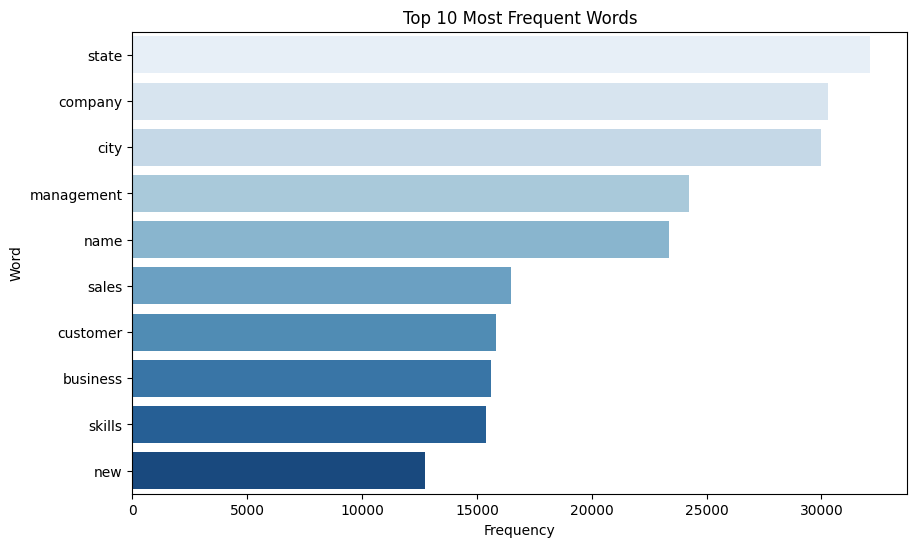

C:\Users\Enter\AppData\Local\Temp\ipykernel_60240\3095267961.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')


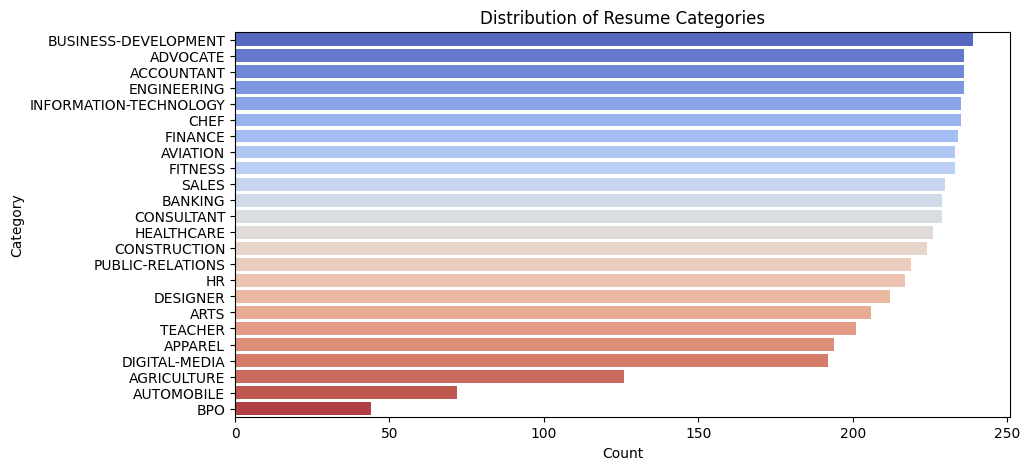

In [135]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Tokenize the cleaned text and get the frequency of each word
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)

# Get the top 10 most common words
top_words = word_freq.most_common(10)

# Check if df is loaded properly
print(df.head())

# Plot the top 10 most frequent words
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='Blues')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Plot category distribution
def plot_category_distribution():
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='coolwarm')
    plt.title("Distribution of Resume Categories")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.show()

# Call the visualization function
plot_category_distribution()



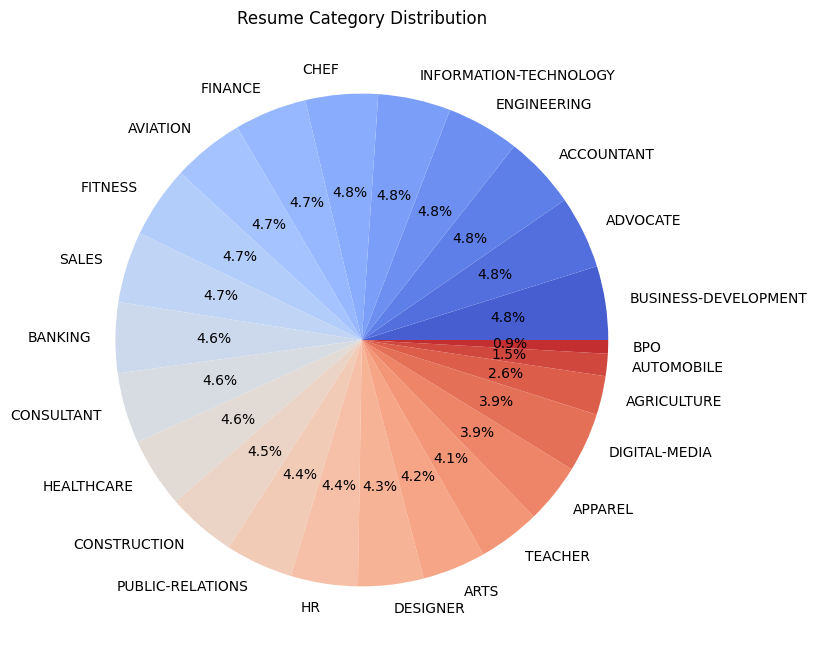

In [133]:
%matplotlib inline
# Plot a pie chart for category distribution
plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(df['Category'].unique())))
plt.title("Resume Category Distribution")
plt.ylabel('')
plt.show()



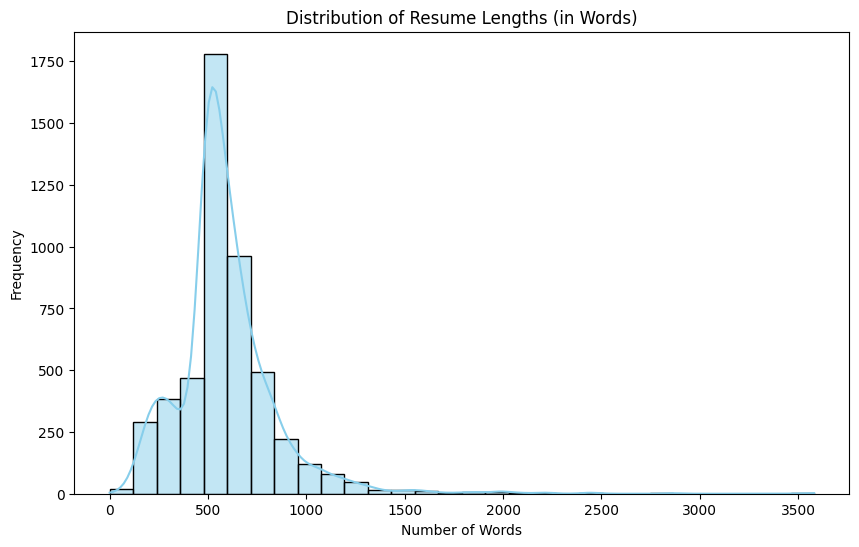

In [136]:
%matplotlib inline
# Create a new column for resume length
df['resume_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot resume length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['resume_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Resume Lengths (in Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


C:\Users\Enter\AppData\Local\Temp\ipykernel_60240\144381285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length.values, y=avg_length.index, palette='viridis')


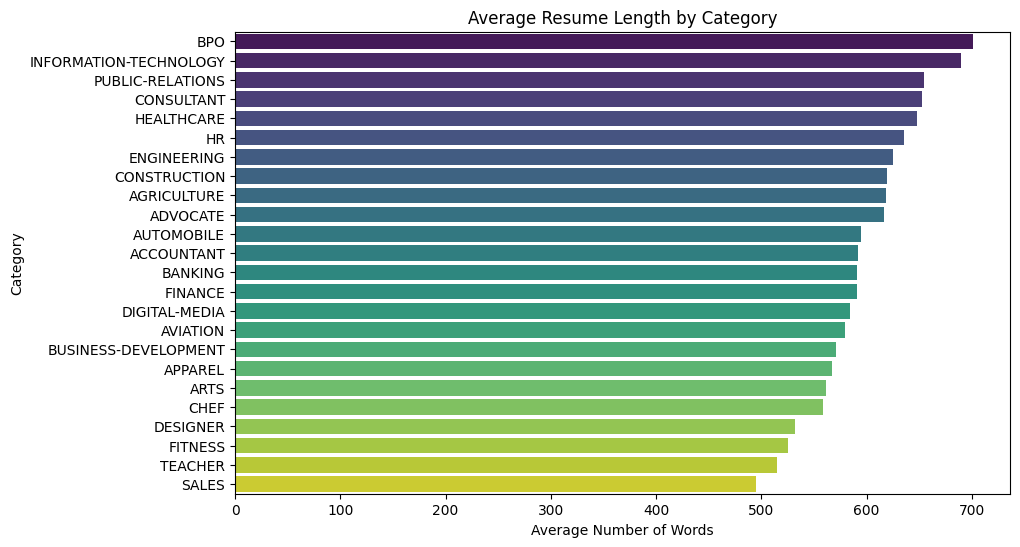

In [139]:
# Plot average resume length per category
avg_length = df.groupby('Category')['resume_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_length.values, y=avg_length.index, palette='viridis')
plt.title("Average Resume Length by Category")
plt.xlabel("Average Number of Words")
plt.ylabel("Category")
plt.show()


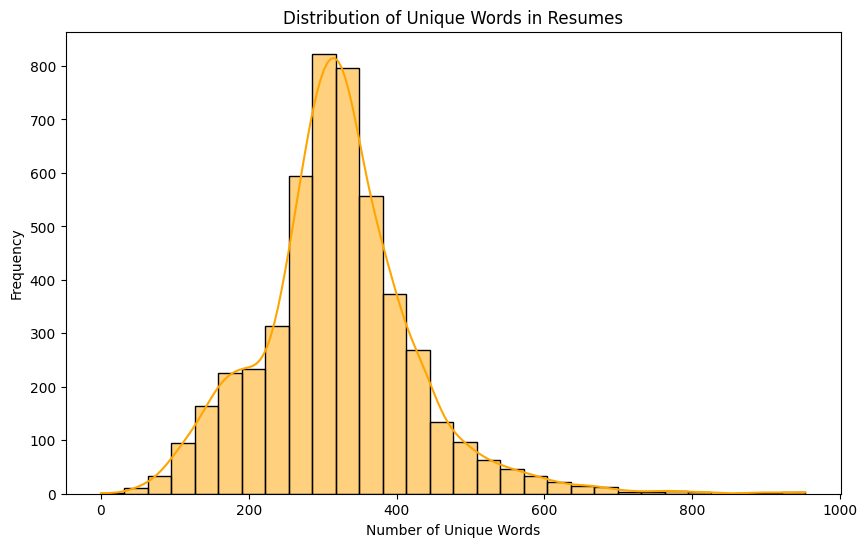

In [140]:
%matplotlib inline
# Count unique words per resume
df['unique_word_count'] = df['cleaned_text'].apply(lambda x: len(set(x.split())))

# Plot distribution of unique words
plt.figure(figsize=(10, 6))
sns.histplot(df['unique_word_count'], bins=30, kde=True, color='orange')
plt.title("Distribution of Unique Words in Resumes")
plt.xlabel("Number of Unique Words")
plt.ylabel("Frequency")
plt.show()


In [ ]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Encode target labels
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Convert text into numerical format
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Unigrams + Bigrams
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Category_encoded']

# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [142]:
# Check value counts after SMOTE
resampled_counts = pd.Series(y_resampled).value_counts()
print("\nCategory distribution after SMOTE:")
print(resampled_counts)



Category distribution after SMOTE:
Category_encoded
19    239
13    239
4     239
7     239
21    239
11    239
0     239
15    239
3     239
16    239
10    239
5     239
14    239
12    239
22    239
8     239
2     239
17    239
18    239
9     239
1     239
23    239
20    239
6     239
Name: count, dtype: int64


In [146]:
!pip install lightgbm

                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 1.3 MB/s eta 0:00:02
     ---                                      0.1/1.5 MB 1.1 MB/s eta 0:00:02
     -----                                    0.2/1.5 MB 1.5 MB/s eta 0:00:01
     ---------                                0.3/1.5 MB 1.7 MB/s eta 0:00:01
     -------------                            0.5/1.5 MB 2.1 MB/s eta 0:00:01
     ----------------                         0.6/1.5 MB 1.9 MB/s eta 0:00:01
     -------------------                      0.7/1.5 MB 2.2 MB/s eta 0:00:01
     ------------------------                 0.9/1.5 MB 2.3 MB/s eta 0:00:01
     -----------------------------            1.1/1.5 MB 2.4 MB/s eta 0:00:01
     ---------------------------------        1.2/1.5 MB 2.6 MB/s eta 0:00:01
     --------------------------------------   1.4/1.5 MB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Define models with hyperparameters
models = {
    "RandomForest": RandomForestClassifier(n_estimators=150, random_state=42, class_weight="balanced"),
    "LogisticRegression": LogisticRegression(max_iter=700),
    "SVM": SVC(kernel='linear', probability=True),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
    "BaggingClassifier": BaggingClassifier(n_estimators=100, random_state=42),
    "MultinomialNB": MultinomialNB(),
    "LGBM": LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
}

# Track model accuracies
model_accuracies = {}

best_model, best_accuracy = None, 0
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc  # Store accuracy for later comparison
    
    # Print accuracy and classification report
    print(f"🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))
    
    # Save each model separately
    joblib.dump(model, f"{name.lower()}_model.pkl")
    
    # Update best model if current model performs better
    if acc > best_accuracy:
        best_accuracy, best_model = acc, model

# Save the best model for ATS
joblib.dump(best_model, 'best_resume_classifier2.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer2.pkl')
joblib.dump(label_encoder, 'label_encoder2.pkl')

# Display all model accuracies
print("\n✅ Model training complete. Best model saved for ATS scoring!")
print("\n📊 Model Accuracies:")
for name, acc in model_accuracies.items():
    print(f"🔸 {name}: {acc:.4f}")

print(f"\n🏆 Best Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy:.4f}")



🔹 Training RandomForest...
🔹 RandomForest Accuracy: 0.9599
                        precision    recall  f1-score   support

            ACCOUNTANT       0.93      0.96      0.95        56
              ADVOCATE       0.96      0.93      0.95        58
           AGRICULTURE       1.00      0.90      0.95        52
               APPAREL       1.00      0.96      0.98        53
                  ARTS       0.94      0.88      0.91        34
            AUTOMOBILE       1.00      1.00      1.00        42
              AVIATION       1.00      1.00      1.00        45
               BANKING       0.91      0.95      0.93        42
                   BPO       1.00      1.00      1.00        48
  BUSINESS-DEVELOPMENT       0.90      1.00      0.95        38
                  CHEF       1.00      1.00      1.00        38
          CONSTRUCTION       0.96      1.00      0.98        44
            CONSULTANT       0.95      0.84      0.89        50
              DESIGNER       1.00      1.00

c:\Users\Enter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🔹 LGBM Accuracy: 0.9678
                        precision    recall  f1-score   support

            ACCOUNTANT       0.97      1.00      0.98        56
              ADVOCATE       0.95      0.90      0.92        58
           AGRICULTURE       0.96      0.90      0.93        52
               APPAREL       0.96      0.96      0.96        53
                  ARTS       1.00      0.88      0.94        34
            AUTOMOBILE       1.00      1.00      1.00        42
              AVIATION       1.00      1.00      1.00        45
               BANKING       0.91      0.95      0.93        42
                   BPO       1.00      1.00      1.00        48
  BUSINESS-DEVELOPMENT       0.95      1.00      0.97        38
                  CHEF       1.00      1.00      1.00        38
          CONSTRUCTION       0.96      1.00      0.98        44
            CONSULTANT       0.96      0.92      0.94        50
              DESIGNER       1.00      1.00      1.00        50
         DIGITA

In [3]:
! pip install Flask PyPDF2 nltk fpdf


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40712 sha256=60f977d67b91476368a95b8a9e8e2a3c5c3127a22aca38f6a0b1e545bd083d49
  Stored in directory: c:\users\enter\appdata\local\pip\cache\wheels\65\4f\66\bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import joblib
import PyPDF2
import string
import pandas as pd
import re
import os
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from flask import Flask, request, render_template, jsonify, send_from_directory
from werkzeug.utils import secure_filename
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer

# Initialize Flask App
app = Flask(__name__)
UPLOAD_FOLDER = "uploads"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load Models
vectorizer = joblib.load("tfidf_vectorizer2.pkl")
label_encoder = joblib.load("label_encoder2.pkl")
classifier = joblib.load("best_resume_classifier2.pkl")

# Load Dataset for Real Keywords
df = pd.read_csv("preprocessed_resumes.csv")
CATEGORY_KEYWORDS = {}

for category in df["Category"].unique():
    category_text = " ".join(df[df["Category"] == category]["cleaned_text"].dropna().astype(str))
    words = re.findall(r'\b[a-zA-Z]{3,}\b', category_text)
    frequent_words = pd.Series(words).value_counts().head(20).index.tolist()
    CATEGORY_KEYWORDS[category] = frequent_words

# AI Summarization Model
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

# Load Stopwords
stop_words = set(stopwords.words('english'))

import json
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer

# Initialize Chatbot
chatbot = ChatBot('ResumeBot')

# Load questions and answers from JSON file
with open('faqs.json', 'r') as file:
    qa_data = json.load(file)

# Prepare training data
training_data = []
for item in qa_data:
    training_data.append(item['question'])
    training_data.append(item['answer'])

# Train the chatbot
trainer = ListTrainer(chatbot)
trainer.train(training_data)


# Helper Functions
def preprocess_text(text):
    """Cleans and tokenizes text for processing."""
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = [word for word in text.split() if word not in stop_words]
    return set(words)

def extract_text_from_pdf(pdf_path):
    """Extracts text from PDF files."""
    text = ""
    try:
        with open(pdf_path, "rb") as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() + "\n" if page.extract_text() else ""
    except Exception as e:
        print(f"Error extracting text: {e}")
    return text.strip()

def get_resume_grade(ats_score):
    """Assigns a letter grade to the resume."""
    if ats_score >= 90: return "A+ (Excellent)"
    if ats_score >= 80: return "A (Very Good)"
    if ats_score >= 70: return "B (Good, but can improve)"
    if ats_score >= 60: return "C (Needs some improvements)"
    return "D (Weak - Major improvements needed)"

def generate_feedback(ats_score):
    """Generates feedback based on ATS score dynamically."""
    feedback = []
    if ats_score < 50:
        feedback.append("❌ **Major Improvements Needed:** Your resume may not pass most ATS scans.")
        feedback.append("➡ **Add missing sections:** Ensure Education, Experience, and Skills are clearly mentioned.")
        feedback.append("➡ **Use job-relevant keywords:** Include industry-specific terms from the job description.")
        feedback.append("➡ **Keep formatting simple:** Avoid tables, images, and excessive colors.")
    elif ats_score < 60:
        feedback.append("⚠️ **Significant improvements needed.** Focus on these areas:")
        feedback.append("➡ **Tailor your resume:** Customize it for each job application.")
        feedback.append("➡ **Use action verbs:** Start bullet points with strong action verbs like 'managed', 'developed', 'optimized'.")
    elif ats_score < 70:
        feedback.append("⚠️ **Your resume is average but needs optimization.**")
        feedback.append("➡ **Include more industry-specific keywords.** Check job descriptions for relevant terms.")
        feedback.append("➡ **Ensure clear section headings:** Education, Experience, and Skills should be easily identifiable.")
    elif ats_score < 80:
        feedback.append("✅ **Your resume is good but can be improved!**")
        feedback.append("➡ **Enhance keyword density:** Add relevant terms naturally within job descriptions.")
        feedback.append("➡ **Refine bullet points:** Keep them concise and impactful.")
    elif ats_score < 90:
        feedback.append("✅ **Your resume is well-structured but could use fine-tuning.**")
        feedback.append("➡ **Check grammar & clarity:** Avoid redundant words and overly long sentences.")
    else:
        feedback.append("🎉 **Great job! Your resume is highly optimized!**")
        feedback.append("➡ **Double-check formatting:** Ensure everything is clean and professional.")
    return feedback

def calculate_ats_score(resume_text, category):
    """Calculates ATS score based on keyword matching, formatting, and structure."""
    if not resume_text:
        return 0, ["❌ No text extracted. Ensure it's a valid PDF."]
    resume_words = preprocess_text(resume_text)
    keywords = set(CATEGORY_KEYWORDS.get(category, []))
    matched_keywords = resume_words.intersection(keywords)
    keyword_score = min((len(matched_keywords) / max(1, len(keywords))) * 60, 60)
    formatting_score = 20  # Default formatting score
    if not re.search(r"•|-|\*", resume_text):  # No bullet points
        formatting_score -= 5
    long_sentences = sum(1 for s in sent_tokenize(resume_text) if len(s.split()) > 25)
    if long_sentences > 5:  # Many long sentences
        formatting_score -= 5
    ats_score = round(keyword_score + formatting_score, 2)
    ats_score = min(ats_score, 100)
    missing_keywords = list(keywords - matched_keywords)[:5]  # Limit to 5 missing keywords
    return ats_score, missing_keywords

def enhance_resume(resume_text, category):
    """Enhances the resume by adding missing sections and **only 3 missing keywords**."""
    enhanced_text = resume_text.strip()
    if not re.search(r"\b(Education|Degree|Academic|Qualifications)\b", resume_text, re.IGNORECASE):
        enhanced_text += "\n\n📌 **Education:**\n• Bachelor's/Master's Degree in Relevant Field"
    if not re.search(r"\b(Experience|Work History|Employment)\b", resume_text, re.IGNORECASE):
        enhanced_text += "\n\n📌 **Work Experience:**\n• 2+ years of industry experience in relevant roles"
    if not re.search(r"\b(Skills|Technical Skills|Expertise)\b", resume_text, re.IGNORECASE):
        enhanced_text += "\n\n📌 **Key Skills:**\n• Problem-solving, teamwork, adaptability"
    keywords = set(CATEGORY_KEYWORDS.get(category, []))
    resume_words = set(preprocess_text(resume_text))
    missing_keywords = list(keywords - resume_words)[:3]  
    if missing_keywords:
        enhanced_text += "\n\n📌 **Industry-Specific Keywords:**\n• " + ", ".join(missing_keywords)
    return enhanced_text

def generate_pdf(resume_text, category, filename="enhanced_resume.pdf"):
    """Creates a PDF with the AI-enhanced resume."""
    enhanced_resume_text = enhance_resume(resume_text, category)
    pdf_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    c = canvas.Canvas(pdf_path, pagesize=letter)
    c.setFont("Helvetica", 12)
    c.drawString(100, 750, "📄 AI-Enhanced Resume")
    lines = enhanced_resume_text.split("\n")
    y_position = 730  
    for line in lines:
        c.drawString(100, y_position, line)
        y_position -= 20  
        if y_position < 50:  
            c.showPage()
            c.setFont("Helvetica", 12)
            y_position = 750
    c.save()
    return filename

def generate_analysis_report(resume_text, category, ats_score, feedback, jd_match_score=None, filename="analysis_report.pdf"):
    """Generates a PDF report with resume analysis."""
    pdf_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    c = canvas.Canvas(pdf_path, pagesize=letter)
    c.setFont("Helvetica", 12)
    c.drawString(100, 750, "📊 Resume Analysis Report")
    c.drawString(100, 730, f"✅ ATS Score: {ats_score}")
    c.drawString(100, 710, f"📝 Resume Grade: {get_resume_grade(ats_score)}")
    y_position = 690
    c.drawString(100, y_position, "📌 Feedback:")
    y_position -= 20
    for line in feedback:
        c.drawString(120, y_position, line)
        y_position -= 20
    if jd_match_score is not None:
        c.drawString(100, y_position, f"🔍 Job Description Match Score: {jd_match_score}%")
        y_position -= 30

    missing_keywords = list(set(CATEGORY_KEYWORDS.get(category, [])))[:5]  # ✅ Fixed missing parenthesis
    if missing_keywords:
        c.drawString(100, y_position, "🔑 **Missing Keywords:**")
        y_position -= 20
        for keyword in missing_keywords:
            c.drawString(120, y_position, f"• {keyword}")
            y_position -= 20

    c.save()
    return filename

# Routes
@app.route('/', methods=['GET', 'POST'])
def upload_resume():
    if request.method == 'POST':
        resume_file = request.files.get('resume_file')
        jd_file = request.files.get('jd_file')  # PDF job description
        jd_text_input = request.form.get('jd_text')  # Plain text job description

        if not resume_file or resume_file.filename == '':
            return render_template('index3.html', message='No resume file selected')

        resume_filename = secure_filename(resume_file.filename)
        resume_file_path = os.path.join(app.config['UPLOAD_FOLDER'], resume_filename)
        resume_file.save(resume_file_path)
        resume_text = extract_text_from_pdf(resume_file_path)

        jd_match_score = None
        jd_text = ""

        # Handle job description input (either PDF or plain text)
        if jd_file and jd_file.filename != '':
            jd_filename = secure_filename(jd_file.filename)
            jd_file_path = os.path.join(app.config['UPLOAD_FOLDER'], jd_filename)
            jd_file.save(jd_file_path)
            jd_text = extract_text_from_pdf(jd_file_path)
        elif jd_text_input:
            jd_text = jd_text_input

        # Calculate job description match score if job description is provided
        if jd_text:
            jd_match_score = (len(set(preprocess_text(resume_text)).intersection(set(preprocess_text(jd_text)))) / len(set(preprocess_text(jd_text)))) * 100

        resume_vector = vectorizer.transform([resume_text])
        category_index = classifier.predict(resume_vector)[0]
        category = label_encoder.inverse_transform([category_index])[0]
        ats_score, missing_keywords = calculate_ats_score(resume_text, category)
        feedback = generate_feedback(ats_score)
        enhanced_resume_filename = generate_pdf(resume_text, category)
        report_filename = generate_analysis_report(resume_text, category, ats_score, feedback, jd_match_score)

        return render_template('index3.html', category=category, ats_score=ats_score,
                               resume_grade=get_resume_grade(ats_score), pdf_link=enhanced_resume_filename,
                               feedback=feedback, jd_match_score=jd_match_score, report_link=report_filename)
    return render_template('index3.html')

@app.route('/download_resume')
def download_resume():
    return send_from_directory(app.config['UPLOAD_FOLDER'], "enhanced_resume.pdf", as_attachment=True)

@app.route('/download_report')
def download_report():
    return send_from_directory(app.config['UPLOAD_FOLDER'], "analysis_report.pdf", as_attachment=True)


@app.route('/chat', methods=['POST'])
def chat():
    user_input = request.json.get('message')
    response = chatbot.get_response(user_input)
    return jsonify({'response': str(response)})

if __name__ == '__main__':
    app.run(debug=False)

c:\Users\Enter\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device set to use cpu
List Trainer: 54it [00:00, 215.61it/s]


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Mar/2025 09:16:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 09:16:16] "GET /favicon.ico HTTP/1.1" 404 -
c:\Users\Enter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [24/Mar/2025 09:16:35] "POST / HTTP/1.1" 200 -


In [16]:
import joblib
import PyPDF2
import string
import pandas as pd
import re
import os
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from flask import Flask, request, render_template, jsonify, send_from_directory
from werkzeug.utils import secure_filename
from textblob import TextBlob
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer
import json

# Initialize Flask App
app = Flask(__name__)
UPLOAD_FOLDER = "uploads"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load Models
vectorizer = joblib.load("tfidf_vectorizer2.pkl")
label_encoder = joblib.load("label_encoder2.pkl")
classifier = joblib.load("best_resume_classifier2.pkl")

# Load Dataset for Real Keywords
df = pd.read_csv("preprocessed_resumes.csv")
CATEGORY_KEYWORDS = {}

for category in df["Category"].unique():
    category_text = " ".join(df[df["Category"] == category]["cleaned_text"].dropna().astype(str))
    words = re.findall(r'\b[a-zA-Z]{3,}\b', category_text)
    frequent_words = pd.Series(words).value_counts().head(20).index.tolist()
    CATEGORY_KEYWORDS[category] = frequent_words

# Load Stopwords
stop_words = set(stopwords.words('english'))

# Initialize Chatbot
chatbot = ChatBot('ResumeBot')

# Load questions and answers from JSON file
with open('faqs.json', 'r') as file:
    qa_data = json.load(file)

# Prepare training data
training_data = []
for item in qa_data:
    training_data.append(item['question'])
    training_data.append(item['answer'])

# Train the chatbot
trainer = ListTrainer(chatbot)
trainer.train(training_data)

# Helper Functions
def preprocess_text(text):
    """Cleans and tokenizes text for processing."""
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = [word for word in text.split() if word not in stop_words]
    return set(words)

def extract_text_from_pdf(pdf_path):
    """Extracts text from PDF files."""
    text = ""
    try:
        with open(pdf_path, "rb") as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() + "\n" if page.extract_text() else ""
    except Exception as e:
        print(f"Error extracting text: {e}")
    return text.strip()

def get_resume_grade(ats_score):
    """Assigns a letter grade to the resume."""
    if ats_score >= 90: return "A+ (Excellent)"
    if ats_score >= 80: return "A (Very Good)"
    if ats_score >= 70: return "B (Good, but can improve)"
    if ats_score >= 60: return "C (Needs some improvements)"
    return "D (Weak - Major improvements needed)"

def generate_feedback(ats_score):
    """Generates feedback based on ATS score dynamically."""
    feedback = []
    if ats_score < 50:
        feedback.append("❌ **Major Improvements Needed:** Your resume may not pass most ATS scans.")
        feedback.append("➡ **Add missing sections:** Ensure Education, Experience, and Skills are clearly mentioned.")
        feedback.append("➡ **Use job-relevant keywords:** Include industry-specific terms from the job description.")
        feedback.append("➡ **Keep formatting simple:** Avoid tables, images, and excessive colors.")
    elif ats_score < 60:
        feedback.append("⚠️ **Significant improvements needed.** Focus on these areas:")
        feedback.append("➡ **Tailor your resume:** Customize it for each job application.")
        feedback.append("➡ **Use action verbs:** Start bullet points with strong action verbs like 'managed', 'developed', 'optimized'.")
    elif ats_score < 70:
        feedback.append("⚠️ **Your resume is average but needs optimization.**")
        feedback.append("➡ **Include more industry-specific keywords.** Check job descriptions for relevant terms.")
        feedback.append("➡ **Ensure clear section headings:** Education, Experience, and Skills should be easily identifiable.")
    elif ats_score < 80:
        feedback.append("✅ **Your resume is good but can be improved!**")
        feedback.append("➡ **Enhance keyword density:** Add relevant terms naturally within job descriptions.")
        feedback.append("➡ **Refine bullet points:** Keep them concise and impactful.")
    elif ats_score < 90:
        feedback.append("✅ **Your resume is well-structured but could use fine-tuning.**")
        feedback.append("➡ **Check grammar & clarity:** Avoid redundant words and overly long sentences.")
    else:
        feedback.append("🎉 **Great job! Your resume is highly optimized!**")
        feedback.append("➡ **Double-check formatting:** Ensure everything is clean and professional.")
    return feedback

def calculate_ats_score(resume_text, category):
    """Calculates ATS score based on keyword matching, formatting, and structure."""
    if not resume_text:
        return 0, ["❌ No text extracted. Ensure it's a valid PDF."]
    resume_words = preprocess_text(resume_text)
    keywords = set(CATEGORY_KEYWORDS.get(category, []))
    matched_keywords = resume_words.intersection(keywords)
    keyword_score = min((len(matched_keywords) / max(1, len(keywords))) * 60, 60)
    formatting_score = 20  # Default formatting score
    if not re.search(r"•|-|\*", resume_text):  # No bullet points
        formatting_score -= 5
    long_sentences = sum(1 for s in sent_tokenize(resume_text) if len(s.split()) > 25)
    if long_sentences > 5:  # Many long sentences
        formatting_score -= 5
    ats_score = round(keyword_score + formatting_score, 2)
    ats_score = min(ats_score, 100)
    missing_keywords = list(keywords - matched_keywords)[:5]  # Limit to 5 missing keywords
    return ats_score, missing_keywords

# ... (keep all previous imports and setup code the same)

def generate_analysis_report(resume_text, category, ats_score, feedback, jd_match_score=None, filename="analysis_report.pdf"):
    """Generates a PDF report with resume analysis."""
    pdf_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    c = canvas.Canvas(pdf_path, pagesize=letter)
    c.setFont("Helvetica", 12)
    c.drawString(100, 750, "📊 Resume Analysis Report")
    c.drawString(100, 730, f"✅ ATS Score: {ats_score}")
    c.drawString(100, 710, f"📝 Resume Grade: {get_resume_grade(ats_score)}")
    
    # Add JD match score if provided
    y_position = 690
    if jd_match_score is not None:
        c.drawString(100, y_position, f"🔍 JD Match Score: {jd_match_score}%")
        y_position -= 20
    
    c.drawString(100, y_position, "📌 Feedback:")
    y_position -= 20
    for line in feedback:
        c.drawString(120, y_position, line)
        y_position -= 20

    missing_keywords = list(set(CATEGORY_KEYWORDS.get(category, [])))[:5]
    if missing_keywords:
        c.drawString(100, y_position, "🔑 Missing Keywords:")
        y_position -= 20
        for keyword in missing_keywords:
            c.drawString(120, y_position, f"• {keyword}")
            y_position -= 20

    c.save()
    return filename

# ... (keep all previous imports and setup code the same)

@app.route('/', methods=['GET', 'POST'])
def upload_resume():
    if request.method == 'POST':
        resume_file = request.files.get('resume_file')
        jd_text = request.form.get('jd_text')

        if not resume_file or resume_file.filename == '':
            return render_template('index.html', message='No resume file selected')

        # Process resume
        resume_filename = secure_filename(resume_file.filename)
        resume_file_path = os.path.join(app.config['UPLOAD_FOLDER'], resume_filename)
        resume_file.save(resume_file_path)
        resume_text = extract_text_from_pdf(resume_file_path)

        # Calculate JD match if provided
        jd_match_score = None
        if jd_text and jd_text.strip():
            try:
                # Calculate intersection of resume and JD keywords
                resume_keywords = preprocess_text(resume_text)
                jd_keywords = preprocess_text(jd_text)
                
                # Avoid division by zero
                if len(jd_keywords) > 0:
                    common_keywords = resume_keywords.intersection(jd_keywords)
                    jd_match_score = round((len(common_keywords) / len(jd_keywords)) * 100, 2)
                else:
                    jd_match_score = 0
            except Exception as e:
                print(f"Error calculating JD match: {e}")
                jd_match_score = 0

        # Get predictions
        resume_vector = vectorizer.transform([resume_text])
        category_index = classifier.predict(resume_vector)[0]
        category = label_encoder.inverse_transform([category_index])[0]
        ats_score, missing_keywords = calculate_ats_score(resume_text, category)
        feedback = generate_feedback(ats_score)
        
        # Generate report
        report_filename = generate_analysis_report(
            resume_text=resume_text,
            category=category,
            ats_score=ats_score,
            feedback=feedback,
            jd_match_score=jd_match_score
        )

        return render_template('index.html', 
                            resume_text=resume_text[:1000] + ("..." if len(resume_text) > 1000 else ""),
                            resume_name=resume_filename,
                            category=category, 
                            ats_score=ats_score,
                            resume_grade=get_resume_grade(ats_score),
                            feedback=feedback, 
                            jd_match_score=jd_match_score,
                            missing_keywords=missing_keywords[:5],
                            report_link=report_filename)
    
    return render_template('index.html')

# ... (keep all other routes and functions the same)
@app.route('/download_report')
def download_report():
    return send_from_directory(app.config['UPLOAD_FOLDER'], "analysis_report.pdf", as_attachment=True)

@app.route('/chat', methods=['POST'])
def chat():
    user_input = request.json.get('message')
    response = chatbot.get_response(user_input)
    return jsonify({'response': str(response)})

if __name__ == '__main__':
    app.run(debug=False)

List Trainer: 54it [00:00, 324.02it/s]


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Apr/2025 22:18:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2025 22:18:29] "GET /favicon.ico HTTP/1.1" 404 -
c:\Users\Enter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [04/Apr/2025 22:19:12] "POST / HTTP/1.1" 200 -
c:\Users\Enter\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [04/Apr/2025 22:19:38] "POST / HTTP/1.1" 200 -
